In [2]:
from pathlib import Path
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 

c:\Users\m8rqu\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Read the sales data
file_path = Path("C:/Users/m8rqu/Documents/Data BootCamp/wine/wine_data/WineQT.csv")
df_wine = pd.read_csv(file_path)

# Display sample data
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df_wine=df_wine.drop('Id', axis = True)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df_wine.shape

(1143, 12)

In [7]:
duplicate_check = df_wine[df_wine.duplicated()]
duplicate_check

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
46,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
64,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
65,7.7,0.490,0.26,1.90,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5
71,8.1,0.545,0.18,1.90,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1076,7.5,0.380,0.57,2.30,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,6
1113,7.8,0.600,0.26,2.00,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1114,7.8,0.600,0.26,2.00,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1116,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5


In [8]:
df_wine = df_wine.drop_duplicates()
df_wine.shape

(1018, 12)

In [9]:
missing_data = df_wine.isnull().sum()
missing_data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
summary_wine = df_wine.describe()
summary_wine.transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1018.0,8.288507,1.741324,4.60000,7.100000,7.900000,9.100000,15.90000
volatile acidity,1018.0,0.533541,0.183167,0.12000,0.390000,0.520000,0.645000,1.58000
citric acid,1018.0,0.268802,0.196229,0.00000,0.090000,0.250000,0.420000,1.00000
residual sugar,1018.0,2.524411,1.314850,0.90000,1.900000,2.200000,2.600000,15.50000
chlorides,1018.0,0.087187,0.048506,0.01200,0.070000,0.079000,0.090000,0.61100
free sulfur dioxide,1018.0,15.648821,10.176525,1.00000,7.000000,13.000000,21.000000,68.00000
total sulfur dioxide,1018.0,46.325639,33.123533,6.00000,21.000000,38.000000,62.000000,289.00000
density,1018.0,0.996700,0.001916,0.99007,0.995572,0.996665,0.997827,1.00369
pH,1018.0,3.311503,0.157775,2.74000,3.210000,3.310000,3.400000,4.01000
sulphates,1018.0,0.656817,0.167542,0.33000,0.550000,0.620000,0.720000,2.00000


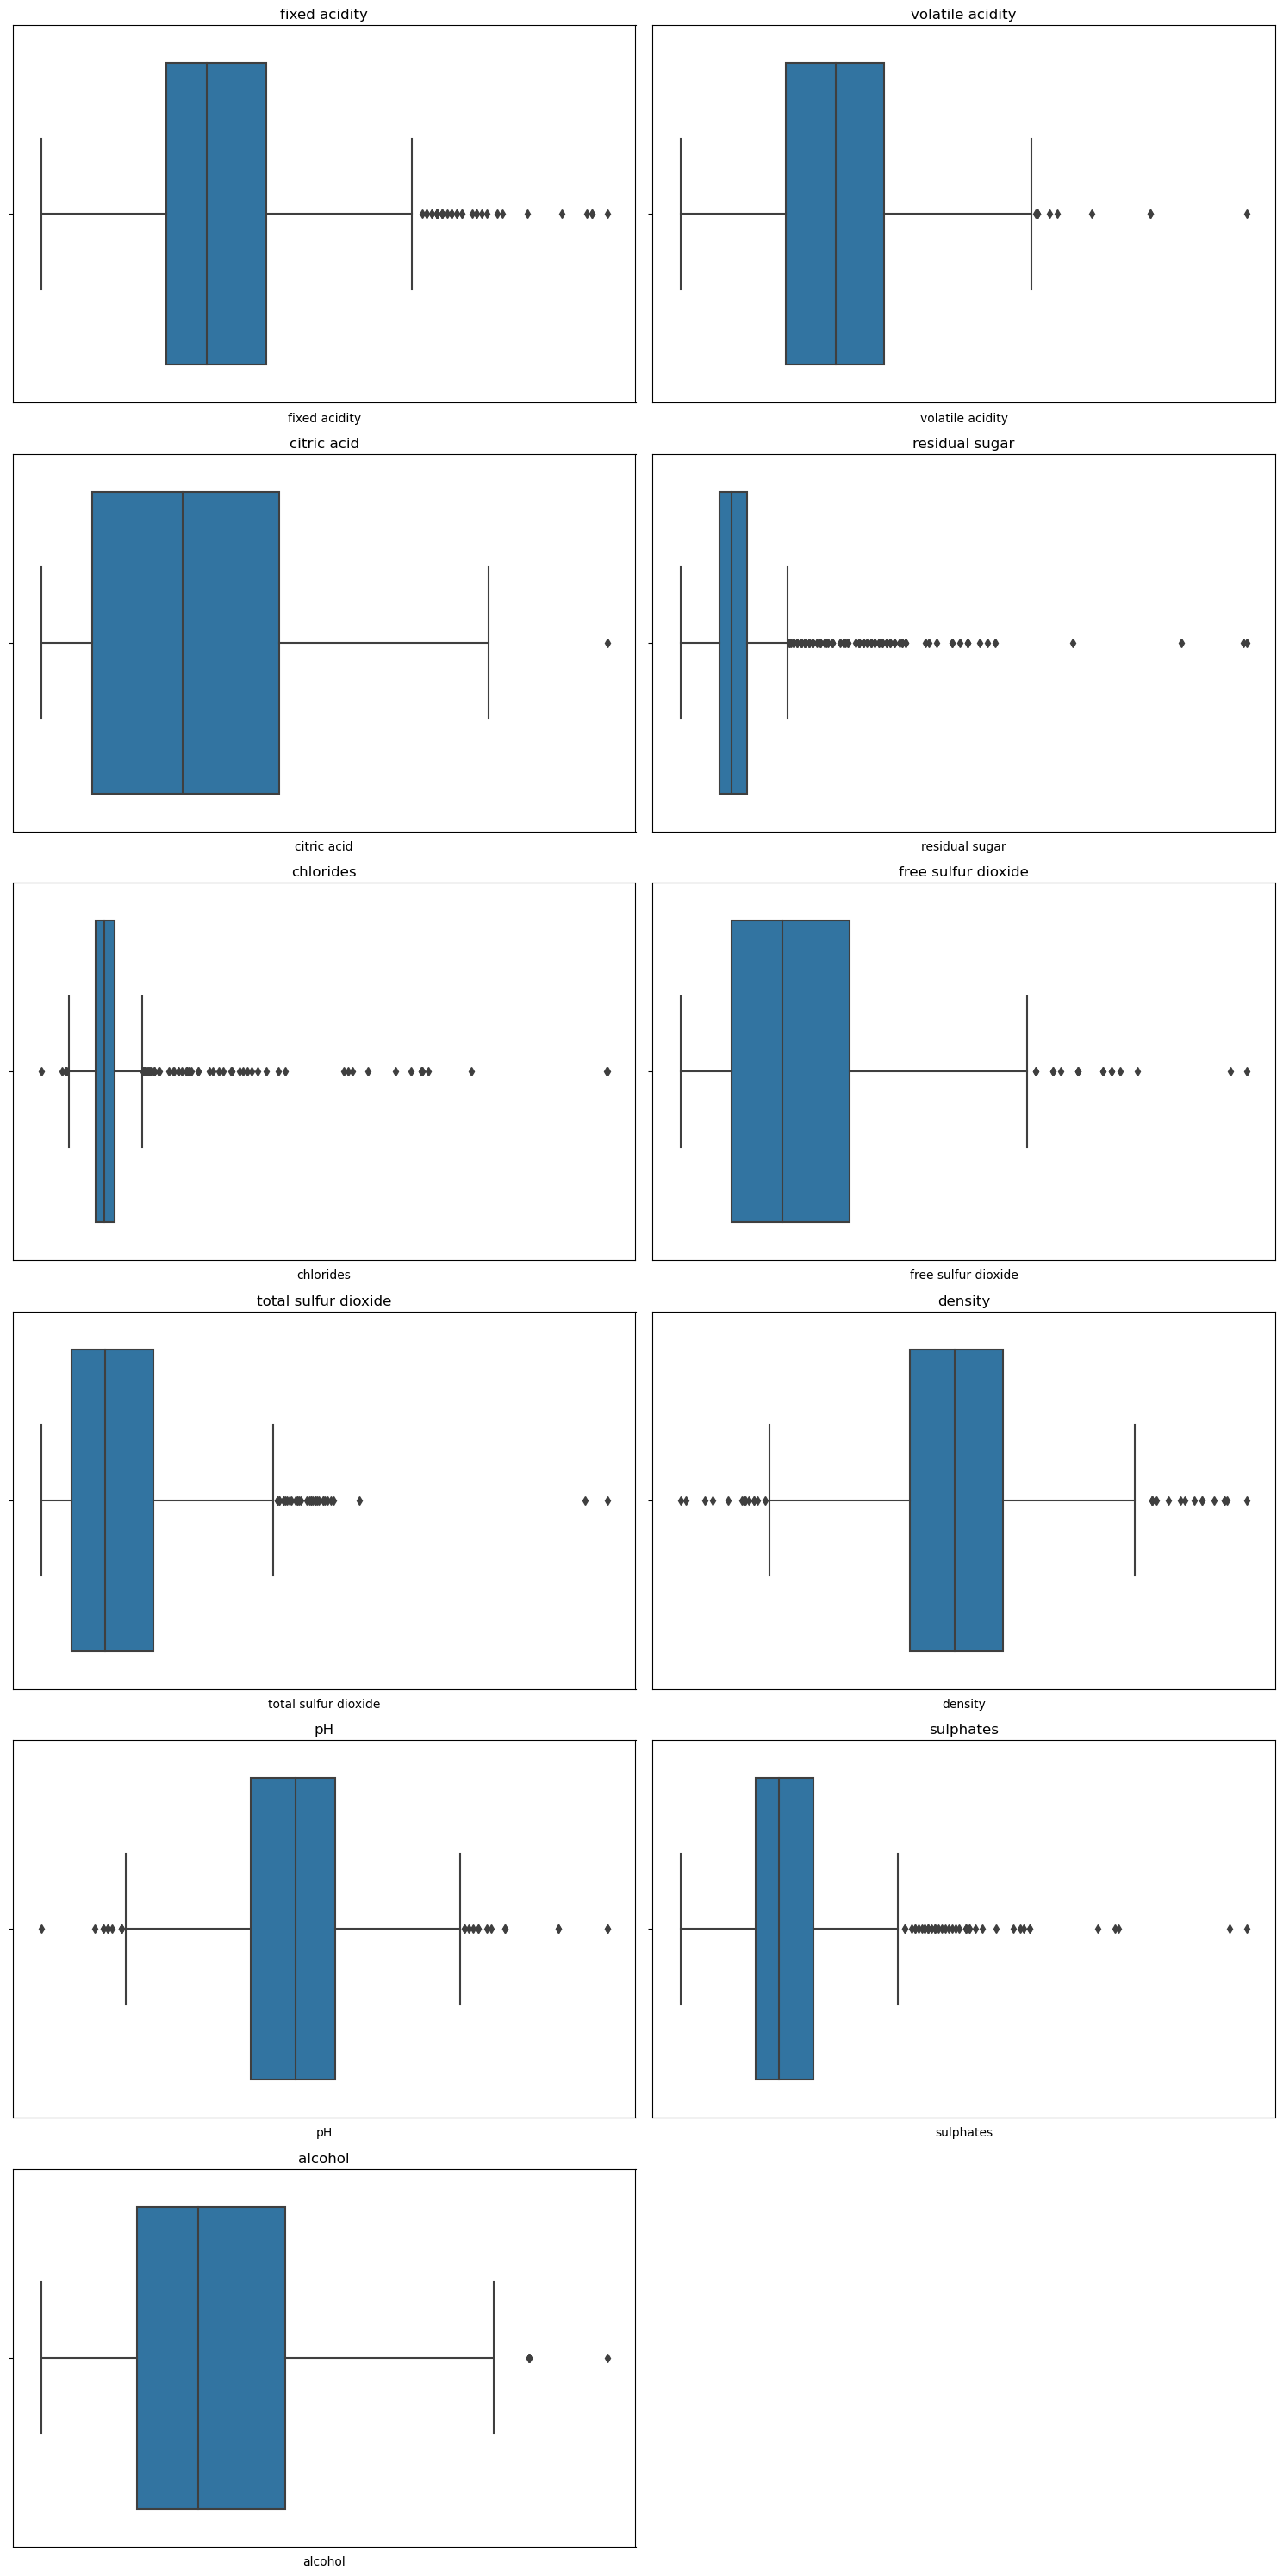

In [11]:
input_columns = df_wine.columns[:-1].tolist()  # Exclude the last column

# Set up subplots
num_columns = len(input_columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot box plots for each selected variable
for i, column in enumerate(input_columns):
    sns.boxplot(x=df_wine[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xticks([])  # Remove existing x-axis ticks
    axes[i].set_xticklabels([])  # Remove existing x-axis tick labels
    axes[i].tick_params(axis='x', rotation=90)  # Set the rotation angle

# Remove empty subplots, if any
for j in range(num_columns, num_rows * 2):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## Removing Outliers


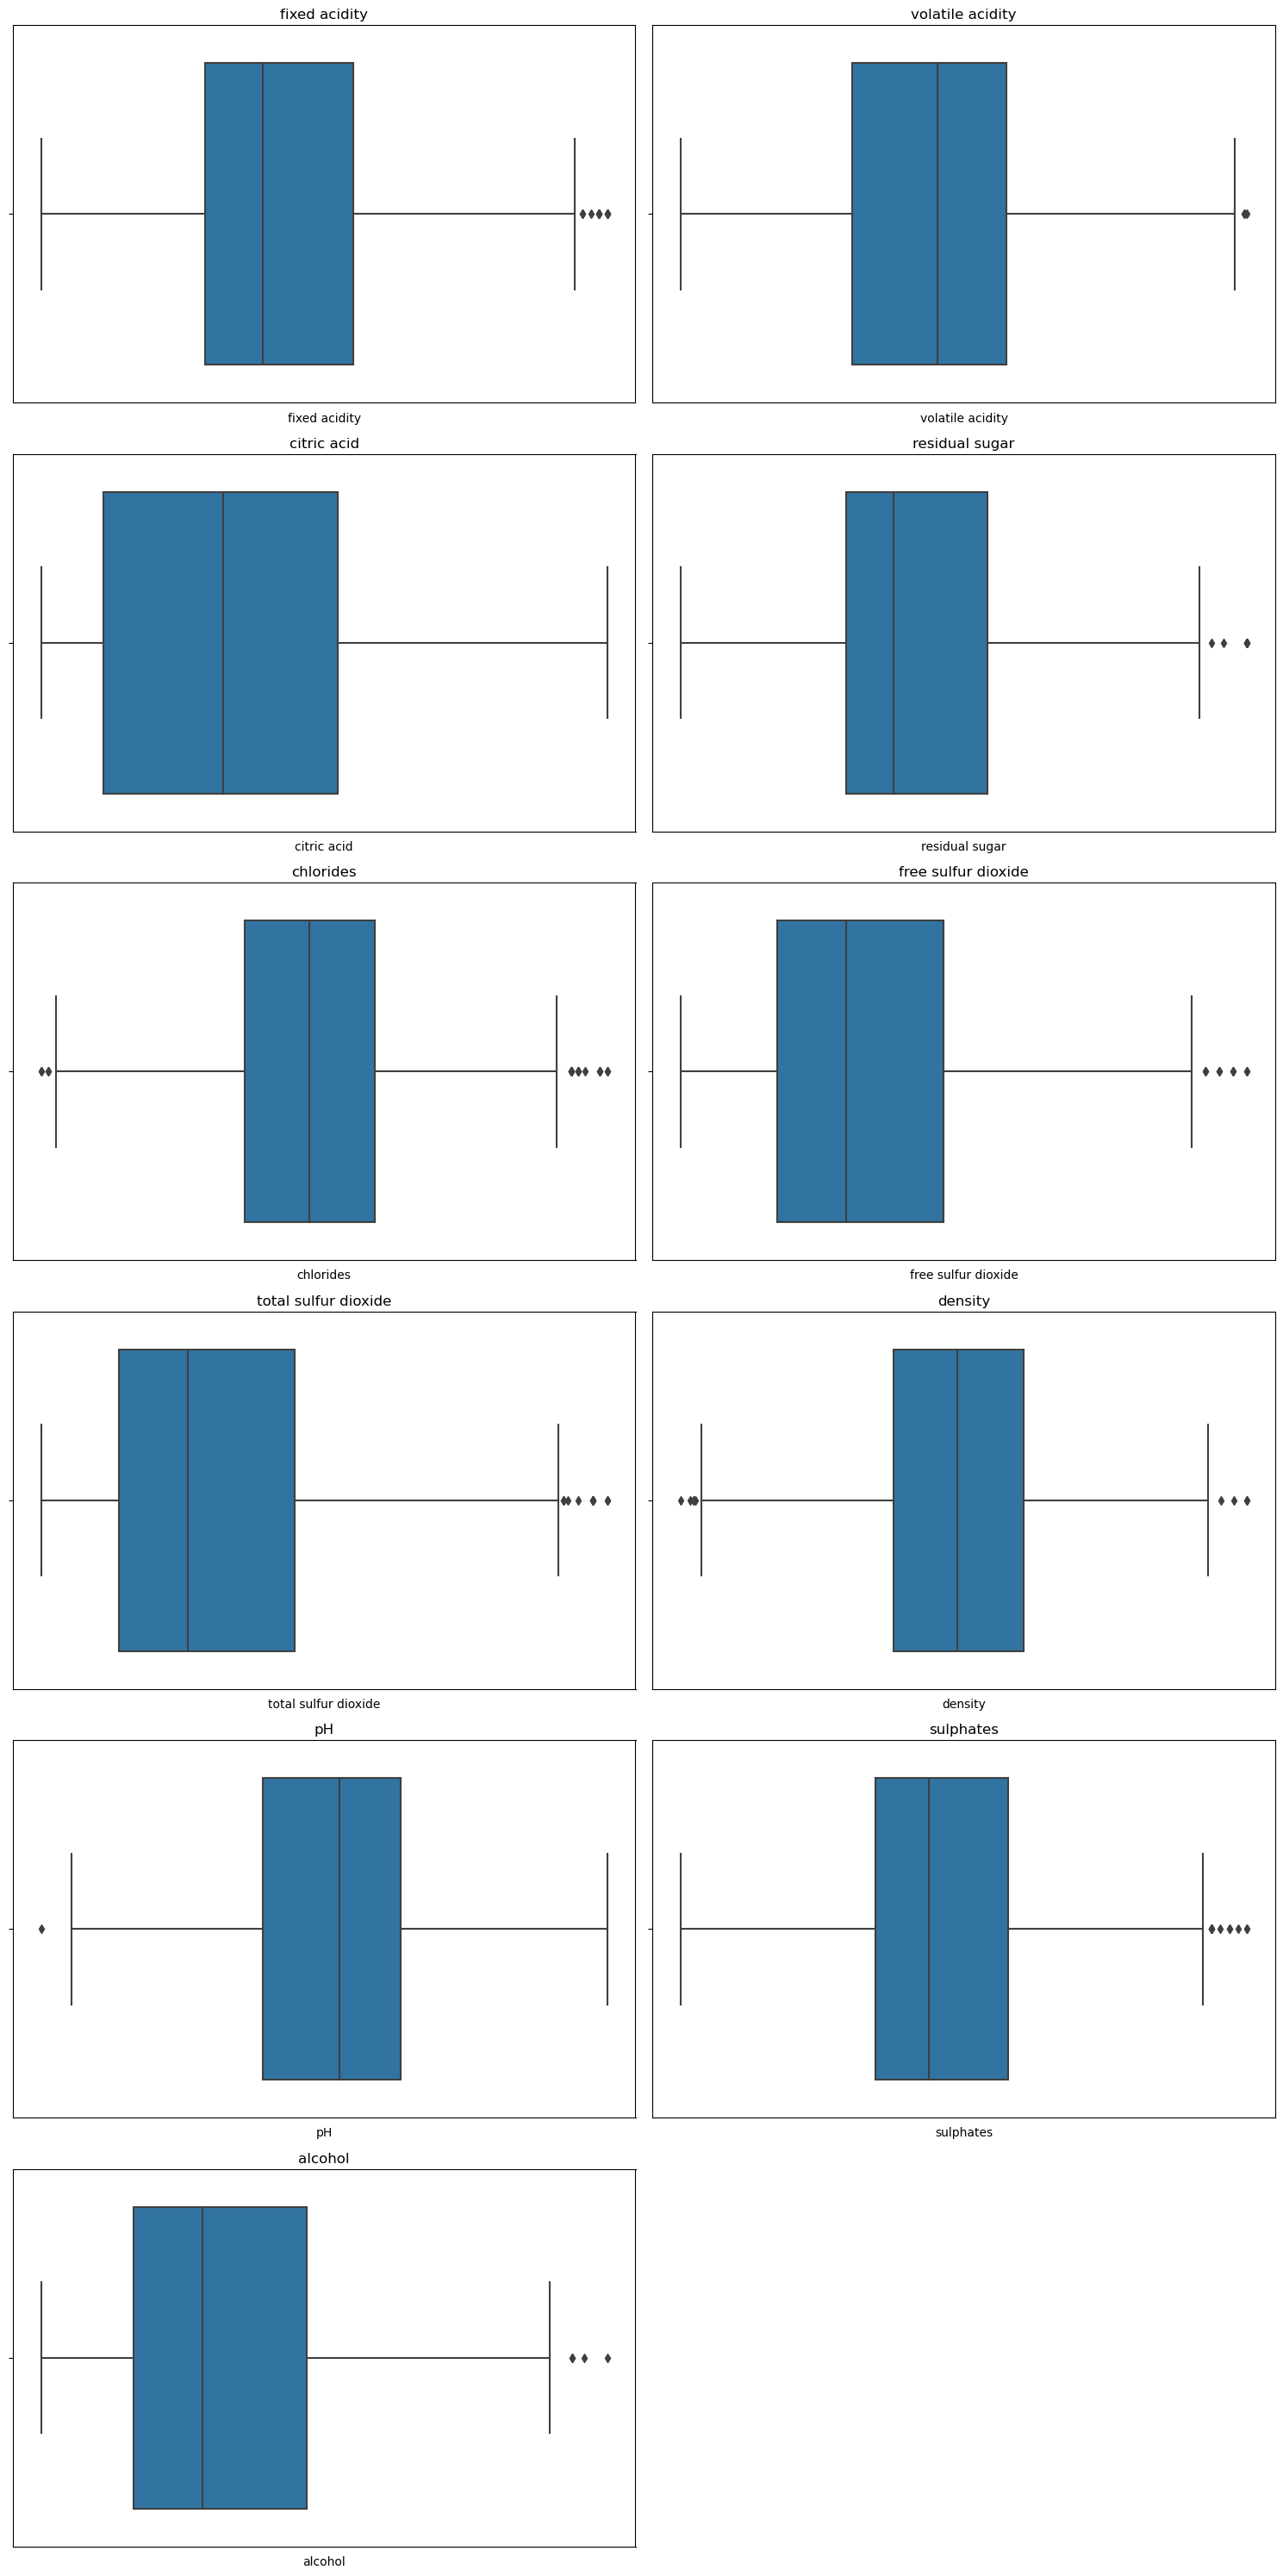

In [17]:
# Calculate the lower and upper bounds for each column
bounds = {}
for column in df_wine.columns[:-1]:
    q1 = df_wine[column].quantile(0.25)
    q3 = df_wine[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    bounds[column] = (lower_bound, upper_bound)

# Filter the DataFrame to exclude outliers
for column, (lower_bound, upper_bound) in bounds.items():
    df_wine = df_wine[(df_wine[column] >= lower_bound) & (df_wine[column] <= upper_bound)]

# Set up subplots
input_columns = df_wine.columns[:-1].tolist()  # Exclude the last column
num_columns = len(input_columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot box plots for each selected variable
for i, column in enumerate(input_columns):
    sns.boxplot(x=df_wine[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xticks([])  # Remove existing x-axis ticks
    axes[i].set_xticklabels([])  # Remove existing x-axis tick labels
    axes[i].tick_params(axis='x', rotation=90)  # Set the rotation angle

# Remove empty subplots, if any
for j in range(num_columns, num_rows * 2):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

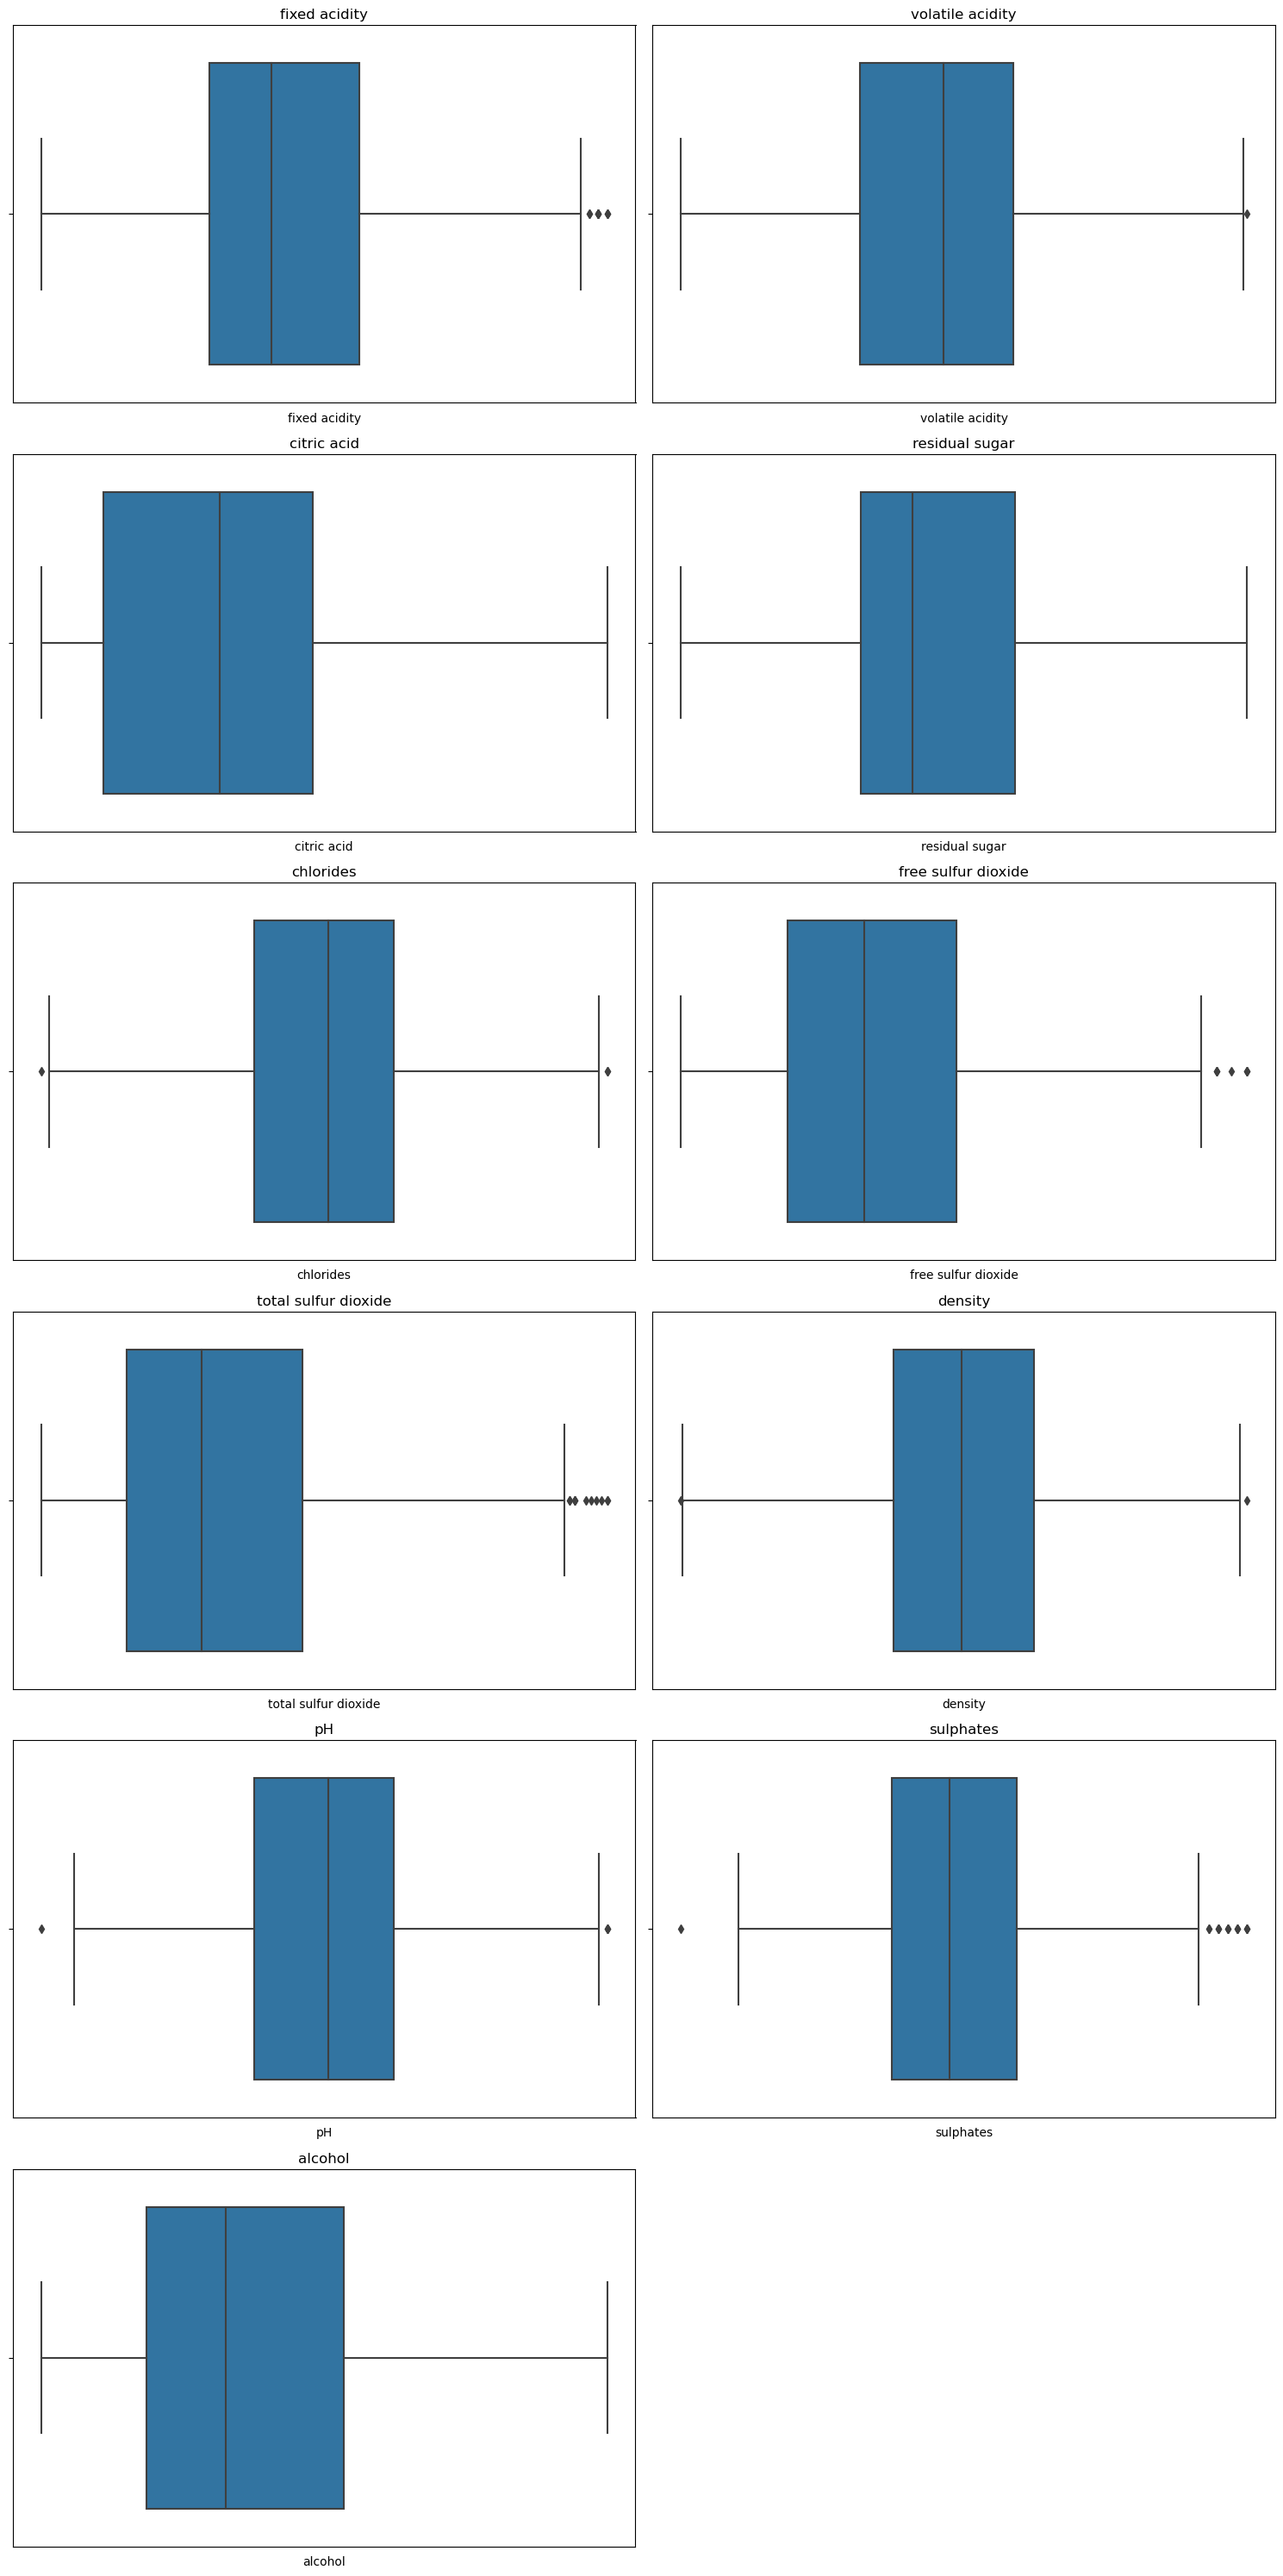

In [24]:
bounds = {}
for column in df_wine.columns[:-1]:
    q1 = df_wine[column].quantile(0.25)
    q3 = df_wine[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    bounds[column] = (lower_bound, upper_bound)

# Filter the DataFrame to exclude outliers
for column, (lower_bound, upper_bound) in bounds.items():
    df_wine = df_wine[(df_wine[column] >= lower_bound) & (df_wine[column] <= upper_bound)]

# Set up subplots
input_columns = df_wine.columns[:-1].tolist()  # Exclude the last column
num_columns = len(input_columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot box plots for each selected variable
for i, column in enumerate(input_columns):
    sns.boxplot(x=df_wine[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xticks([])  # Remove existing x-axis ticks
    axes[i].set_xticklabels([])  # Remove existing x-axis tick labels
    axes[i].tick_params(axis='x', rotation=90)  # Set the rotation angle

# Remove empty subplots, if any
for j in range(num_columns, num_rows * 2):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

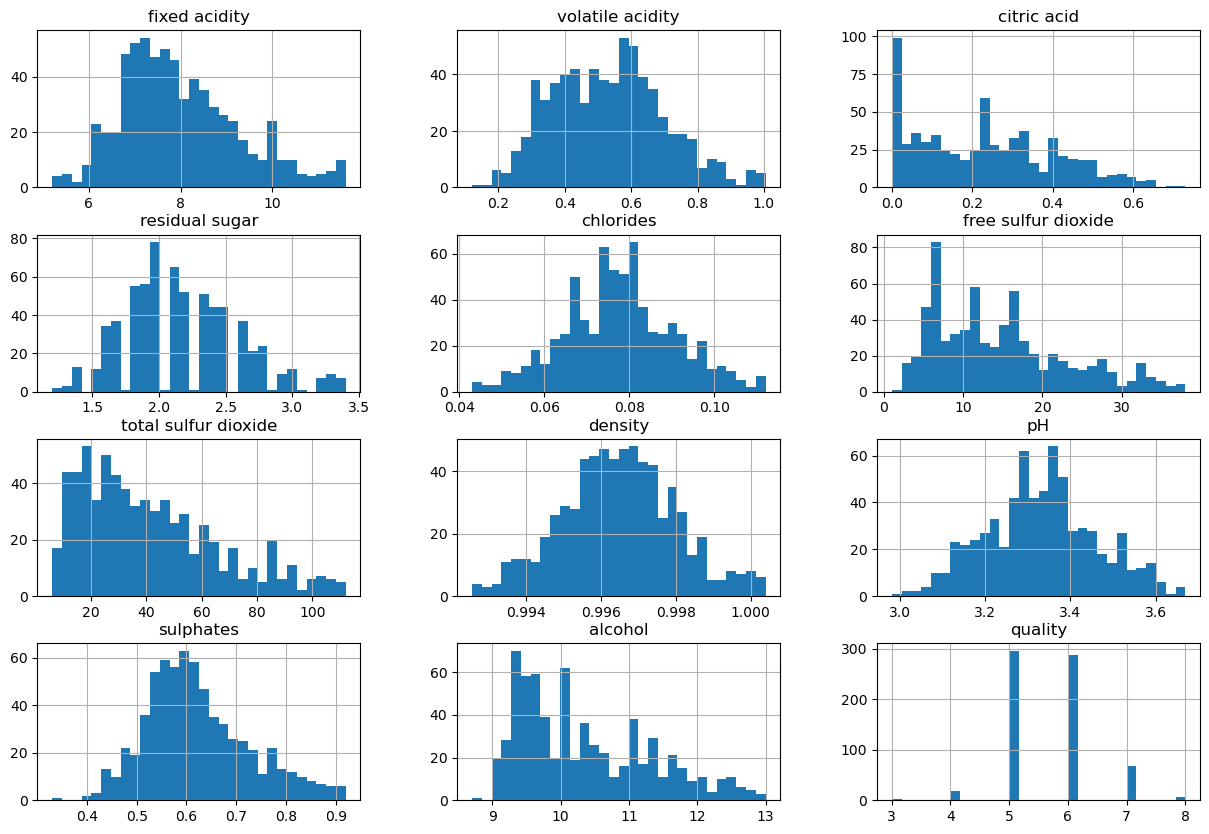

In [25]:
import matplotlib.pyplot as plt

# Assuming df_wine is your DataFrame
df_wine.hist(bins=30, figsize=(15, 10))
plt.show()

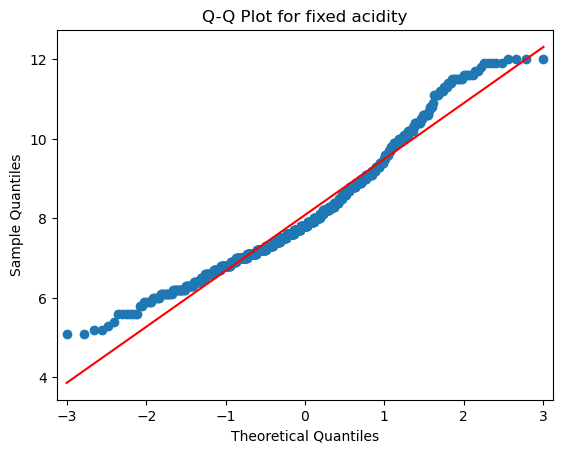

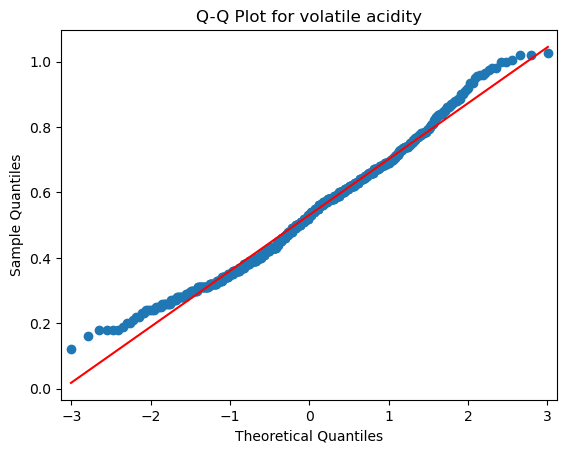

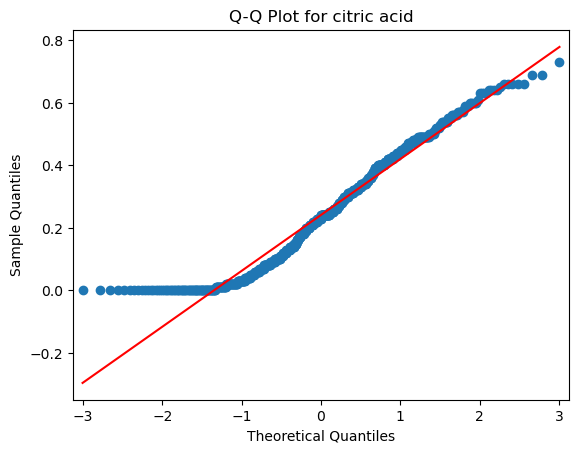

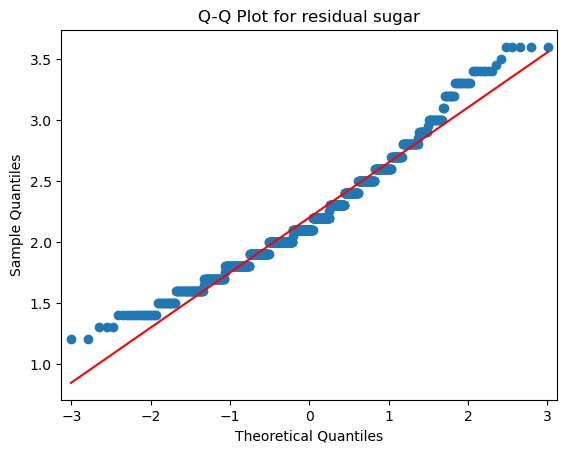

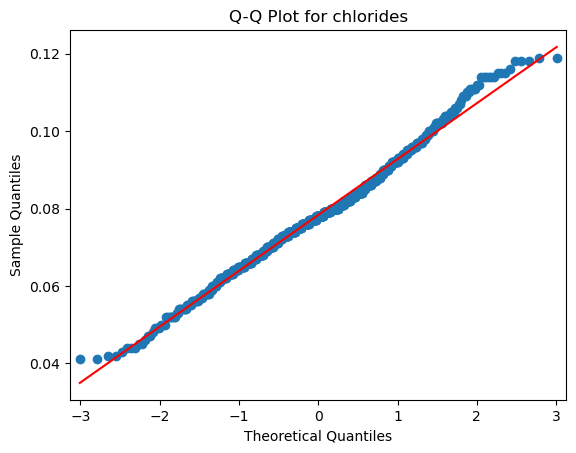

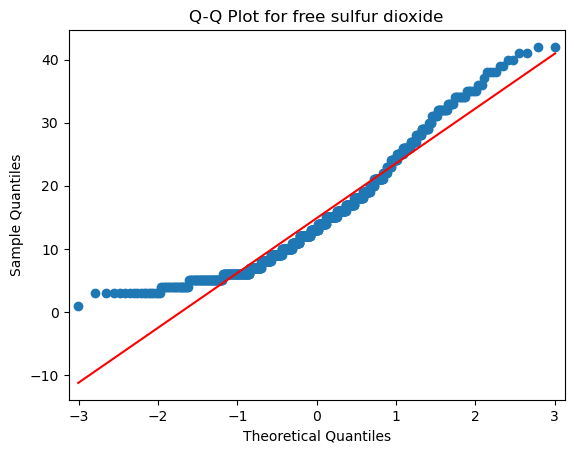

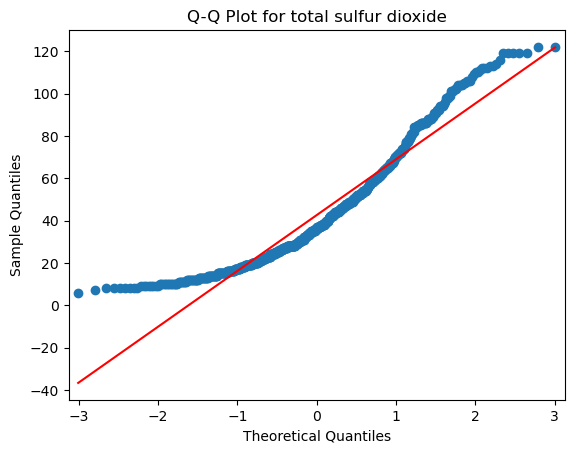

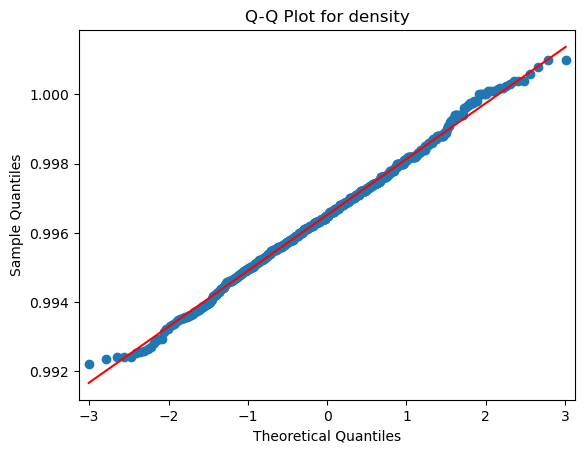

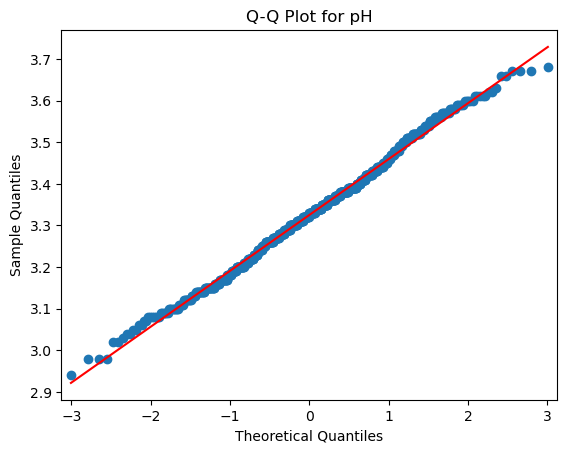

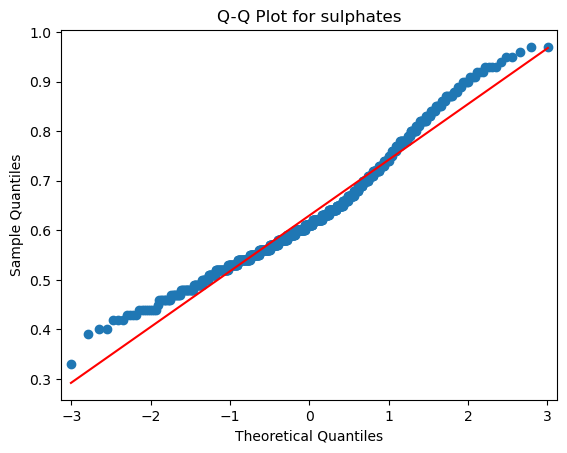

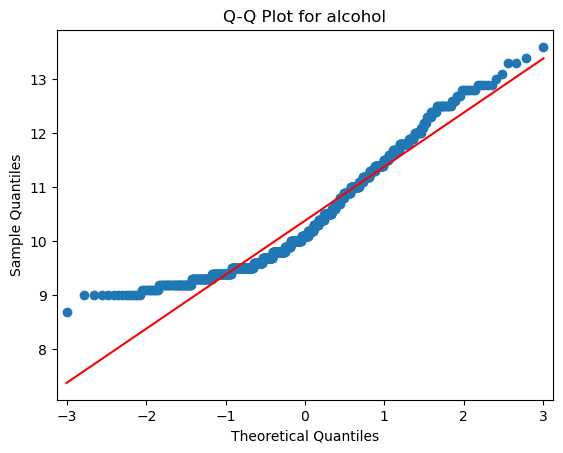

In [19]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming df_wine is your DataFrame
for column in df_wine.columns[:-1]:
    sm.qqplot(df_wine[column], line='s')
    plt.title(f'Q-Q Plot for {column}')
    plt.show()

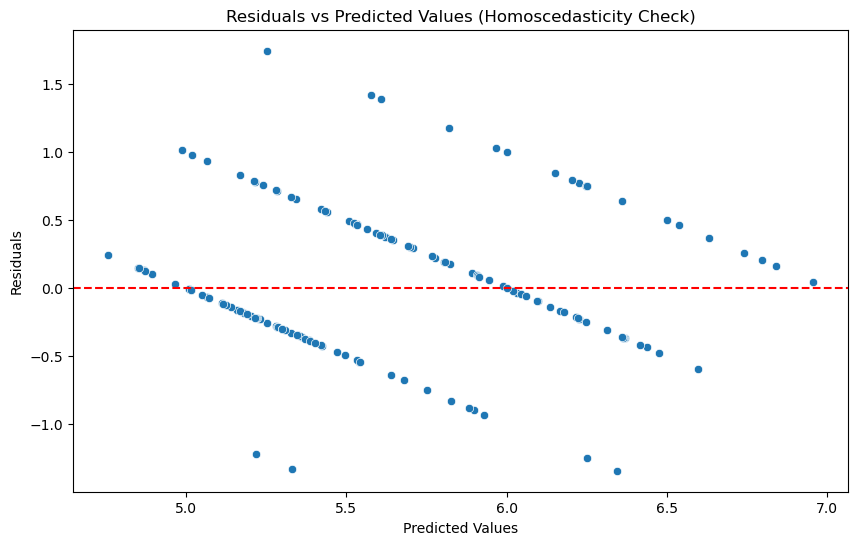

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_wine.drop('quality', axis=1)
y = df_wine['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals versus predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values (Homoscedasticity Check)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_stats = df_wine.agg({
    col: ['mean', 'median', 'var', 'std', 'sem'] for col in df_wine.columns
})
summary_stats.transpose()

,mean,median,var,std,sem
fixed acidity,8.005318,7.80000,1.657279,1.287354,0.049477
volatile acidity,0.531425,0.53000,0.028382,0.168469,0.006475
citric acid,0.232157,0.23000,0.029578,0.171983,0.006610
residual sugar,2.178804,2.10000,0.184968,0.430079,0.016529
chlorides,0.077719,0.07800,0.000171,0.013067,0.000502
free sulfur dioxide,14.599705,13.00000,69.888343,8.359925,0.321298
total sulfur dioxide,41.348597,36.00000,613.626821,24.771492,0.952046
density,0.996480,0.99645,0.000002,0.001520,0.000058
pH,3.331374,3.33000,0.016702,0.129238,0.004967
sulphates,0.622969,0.61000,0.011322,0.106407,0.004090


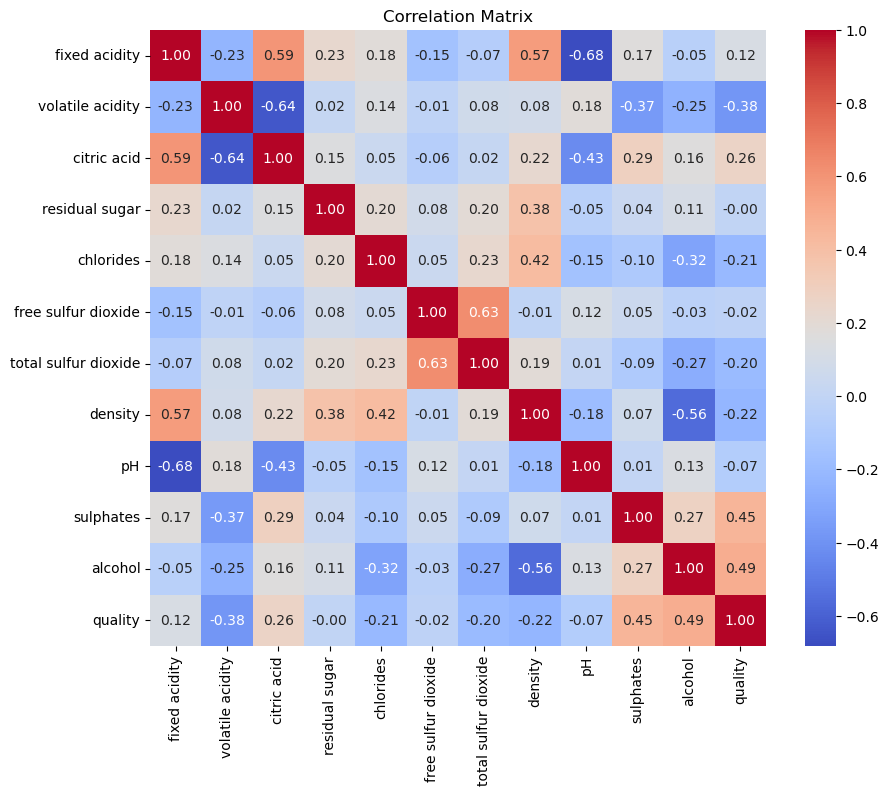

In [36]:

# Calculate correlation matrix
correlation_matrix = df_wine.corr()

# Plot correlation matrix as heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

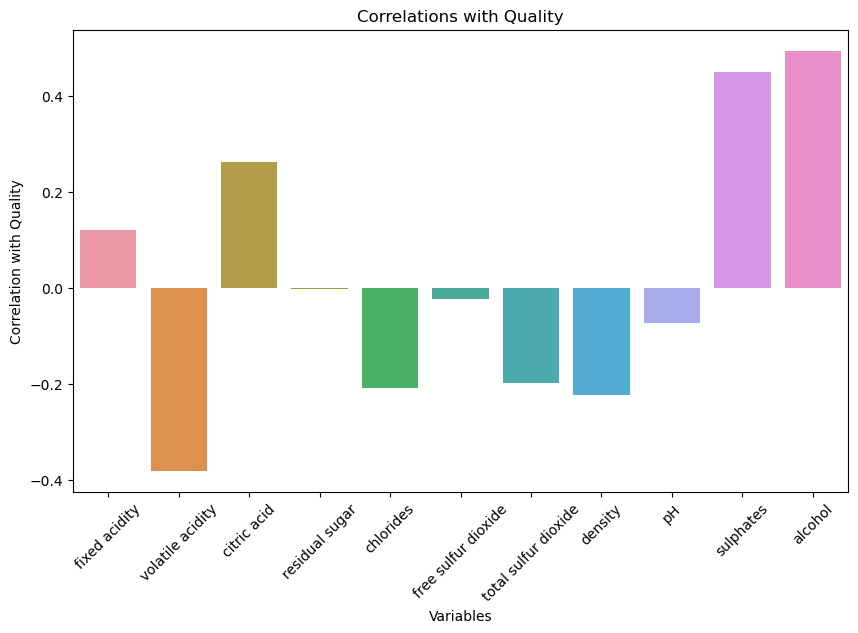

In [41]:
# Select correlations between 'Quality' and other variables
quality_correlations = correlation_matrix['quality'].drop('quality')  # Drop the 'Quality' column

# Plot correlations as barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=quality_correlations.index, y=quality_correlations.values)
plt.xlabel('Variables')
plt.ylabel('Correlation with Quality')
plt.title('Correlations with Quality')
plt.xticks(rotation=45)

plt.show()
